<a href="https://colab.research.google.com/github/bmouale03/MesProjetsWeb/blob/master/Classification_des_classes_de_v%C3%A9hicules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist #Загружаем базу mnist
from tensorflow.keras.datasets import cifar10 #Загружаем базу cifar10
from tensorflow.keras.datasets import cifar100 #Загружаем базу cifar100
from tensorflow.keras.models import Sequential #Сеть прямого распространения
#Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем дял to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений
import random #Для генерации случайных чисел 
import math # Для округления
import os #Для работы с файлами 
# подключем диск
from google.colab import drive

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Загружаем cifar100
(x_train100, y_train100), (x_test100, y_test100) = cifar100.load_data()

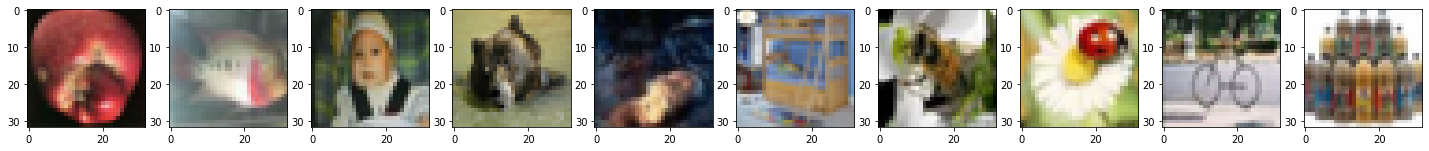

In [ ]:
#Выводим для примера картинки по первым 10 классам

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) #Создаем полотно из 10 графиков
for i in range(10): #Проходим по классам от 0 до 9
  label_indexes = np.where(y_train100==i)[0] #Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) #Случайным образом выбираем из списка индекс
  img = x_train100[index] #Выбираем из x_train нужное изображение
  axs[i].imshow(Image.fromarray(img)) #Отображаем изображение i-ым графиков

plt.show() #Показываем изображения

In [ ]:
#Превращаем y_train и y_test сетей в формат one hot encoding
y_train100 = utils.to_categorical(y_train100, 100)
y_test100 = utils.to_categorical(y_test100, 100)

In [ ]:
# Посмотрим размеры выборок перед обучением
print(x_train100.shape)
print(x_test100.shape)
print(y_train100.shape)
print(y_test100.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 100)
(10000, 100)


**Нейронная сеть**

Epoch 1/40
391/391 [==============================] - 36s 12ms/step - loss: 4.1961 - accuracy: 0.0665 - val_loss: 3.3105 - val_accuracy: 0.2073
Epoch 2/40
391/391 [==============================] - 4s 11ms/step - loss: 3.2910 - accuracy: 0.2058 - val_loss: 2.8627 - val_accuracy: 0.2933
Epoch 3/40
391/391 [==============================] - 4s 11ms/step - loss: 2.8836 - accuracy: 0.2777 - val_loss: 2.6045 - val_accuracy: 0.3388
Epoch 4/40
391/391 [==============================] - 4s 11ms/step - loss: 2.5874 - accuracy: 0.3360 - val_loss: 2.3407 - val_accuracy: 0.3908
Epoch 5/40
391/391 [==============================] - 4s 11ms/step - loss: 2.3926 - accuracy: 0.3760 - val_loss: 2.2167 - val_accuracy: 0.4216
Epoch 6/40
391/391 [==============================] - 4s 11ms/step - loss: 2.2258 - accuracy: 0.4074 - val_loss: 2.1901 - val_accuracy: 0.4238
Epoch 7/40
391/391 [==============================] - 4s 11ms/step - loss: 2.0955 - accuracy: 0.4358 - val_loss: 2.0961 - val_accuracy: 0.444

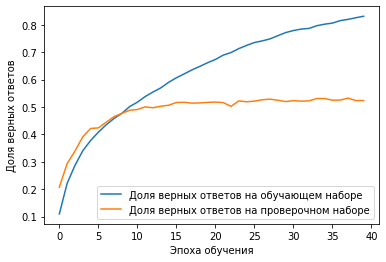

In [ ]:
#задаём batch_size
batch_size = 128 

#Создаем последовательную модель
model = Sequential()
#Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3)))
#Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

#Слой пакетной нормализации
model.add(BatchNormalization())
#Пятый сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#Шестой сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#Третий слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.25))

#Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
#Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.25))
#Выходной полносвязный слой
model.add(Dense(100, activation='softmax'))

#Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Обучаем сеть на данных cifar100
history = model.fit(x_train100, 
                    y_train100, 
                    batch_size=batch_size, 
                    epochs=40,
                    validation_data=(x_test100, y_test100),
                    verbose=1)

#Оображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

#Распознавание марок машин (маленькая база)


In [ ]:
#Загружаем cifar100
(x_train100, y_train100), (x_test100, y_test100) = cifar100.load_data()

In [ ]:
!unzip -q "/content/middle_fmr.zip" -d /content/cars #Указываем путь к базе в Google Drive

replace /content/cars/Ferrari/car_Ferrari__0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
train_path = '/content/cars' #Папка с папками картинок, рассортированных по категориям
batch_size = 25 #Размер выборки
img_width = 96 #Ширина изображения
img_height = 54 #Высота изображения

In [ ]:
#Генератор изображений
datagen = ImageDataGenerator(
    rescale=1. / 255, #Значения цвета меняем на дробные показания
    rotation_range=10, #Поворачиваем изображения при генерации выборки
    width_shift_range=0.1, #Двигаем изображения по ширине при генерации выборки
    height_shift_range=0.1, #Двигаем изображения по высоте при генерации выборки
    zoom_range=0.1, #Зумируем изображения при генерации выборки
    horizontal_flip=True, #Включаем отзеркаливание изображений
    fill_mode='nearest', #Заполнение пикселей вне границ ввода
    validation_split=0.2 #Указываем разделение изображений на обучающую и тестовую выборку
)

In [ ]:
# обучающая выборка
train_generator = datagen.flow_from_directory(
    train_path, #Путь ко всей выборке выборке
    target_size=(img_width, img_height), #Размер изображений
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', #Категориальный тип выборки. Разбиение выборки по маркам авто 
    shuffle=True, #Перемешивание выборки
    subset='training' # устанавливаем как набор для обучения
)

# проверочная выборка
validation_generator = datagen.flow_from_directory(
    train_path, #Путь ко всей выборке выборке
    target_size=(img_width, img_height), #Размер изображений
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', #Категориальный тип выборки. Разбиение выборки по маркам авто 
    shuffle=True, #Перемешивание выборки
    subset='validation' # устанавливаем как валидационный набор
)

Found 2743 images belonging to 3 classes.
Found 684 images belonging to 3 classes.


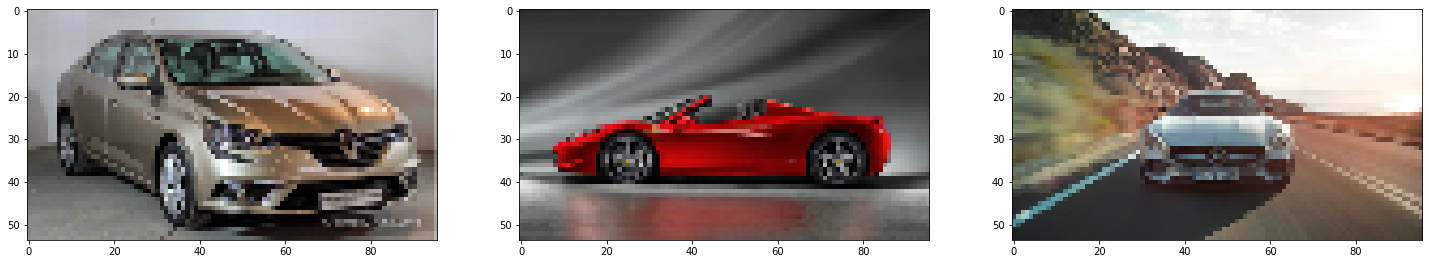

In [ ]:
#Выводим для примера картинки по каждому классу
fig, axs = plt.subplots(1, 3, figsize=(25, 5)) #Создаем полотно из 3 графиков
for i in range(3): #Проходим по всем классам
  car_path = train_path + '/' + os.listdir(train_path)[i] + '/'#Формируем путь к выборке
  img_path = car_path + random.choice(os.listdir(car_path)) #Выбираем случайное фото для отображения
  axs[i].imshow(image.load_img(img_path, target_size=(img_height, img_width))) #Отображение фотографии

plt.show() #Показываем изображения

In [ ]:
#Создаем последовательную модель
model = Sequential()
#Первый сверточный слой
model.add(Conv2D(600, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
#Второй сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
#Третий сверточный слой
model.add(Conv2D(500, (3, 3), padding='same', activation='relu'))
#Слой регуляризации Dropout
model.add(Dropout(0.2))
#Четвертый сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Слой регуляризации Dropout
model.add(Dropout(0.2))
model.add(Dropout(0.2))
#Пятый сверточный слой
model.add(Conv2D(500, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(500, (3, 3), padding='same', activation='relu'))
#Шестой сверточный слой
model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
#Слой регуляризации Dropout
model.add(Dropout(0.2))
model.add(Dropout(0.2))
#Слой преобразования двумерных данных в одномерные 
model.add(Flatten())
#Полносвязный слой
model.add(Dense(3500, activation='relu'))
#Полносвязный слой
model.add(Dense(4096, activation='relu'))
#Вызодной полносвязный слой
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=40,
    verbose=1
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
109/109 [==============================] - 20s 143ms/step - loss: 1.0840 - accuracy: 0.3626 - val_loss: 0.9661 - val_accuracy: 0.4933
Epoch 2/40
109/109 [==============================] - 13s 115ms/step - loss: 0.9127 - accuracy: 0.5394 - val_loss: 0.9684 - val_accuracy: 0.5156
Epoch 3/40
109/109 [==============================] - 13s 115ms/step - loss: 0.8799 - accuracy: 0.5827 - val_loss: 0.9586 - val_accuracy: 0.5230
Epoch 4/40
109/109 [==============================] - 13s 115ms/step - loss: 0.8797 - accuracy: 0.5964 - val_loss: 1.0183 - val_accuracy: 0.5378
Epoch 5/40
109/109 [==============================] - 13s 115ms/step - loss: 0.8170 - accuracy: 0.6242 - val_loss: 0.9090 - val_accuracy: 0.5763
Epoch 6/40
109/109 [==============================] - 13s 116ms/step - loss: 0.8107 - accuracy: 0.6246 - val_loss: 0.8876 - val_accuracy: 0.5911
Epoch 7/40
109/109 [==============================] - 13s 115ms/step - loss: 0.7864 - accuracy: 0.6367 - val_loss: 0.8718 - val_ac

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 96, 54, 256)       7168      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 96, 54, 500)       1152500   
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 32, 18, 500)       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 32, 18, 256)       1152256   
_________________________________________________________________
dropout_29 (Dropout)         (None, 32, 18, 256)       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 32, 18, 400)       922000    
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 9, 400)       

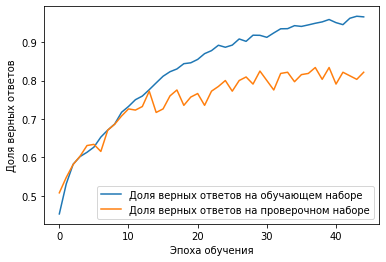

In [ ]:
#Оображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()